## 🕹️ 머신러닝 해석이란?
> 해석은? 무언가를 해석한다는 것은 **"그 의미를 설명하는 것"**
$$\hat{y}=\beta_{0}+\beta_{1}x_{1}$$
> 다음 공식으로 표현되는 가장 기본적인 모델인 단순 선형회귀 모델이다.
>
>데이터에 적합된 이 모델의 의미는 예측 y는 계수 b를 갖는 x 피처의 가중합이라는 것!

### 단순 몸무계 예측 모델의 이해

In [2]:
import math
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [35]:
# 해당 사이트에서부터 200명의 몸무게와 키 데이터를 가져오자
url = 'https://wiki.socr.umich.edu/index.php/SOCR_Data_Dinov_020108_HeightsWeights'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
tbl = soup.find('table', {'class':'wikitable'})

In [36]:
# 인덱스 열을 제외하고, 몸무게와 키 데이터만 가져오죠
height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)', 'Weight(Pounds)']]
height_weight_df.head()

/var/folders/yd/4k8th6097mb8w26m8__j7j140000gn/T/ipykernel_52041/1334047155.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  height_weight_df = pd.read_html(str(tbl))[0][['Height(Inches)', 'Weight(Pounds)']]


,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [37]:
# 총 200개의 데이터가 있는지 확인해볼까요?
num_records = height_weight_df.shape
print(num_records)

(200, 2)


In [42]:
# 사이킷런은 n*1의 형태로 입력데이터를 원하므로, 바꿔줍시다.
x = height_weight_df[['Height(Inches)']]
y = height_weight_df[['Weight(Pounds)']]

In [43]:
# 가장 먼저, 선형회귀 모델을 통해서 절편과 계수를 추출해볼게요.
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

In [49]:
# 위의 선형회귀 식의 모양으로 출력해볼게요.
print('y='+str(model.intercept_[0])+'+'+str(model.coef_[0][0])+'*x')

y=-106.02770644878129+3.4326761292716284*x


In [50]:
# mean_absolute_error을 통해서 편차를 측정해봅시다.
y_pred = model.predict(x)
mae = mean_absolute_error(y_pred, y)
print(mae)

7.7587373803882205


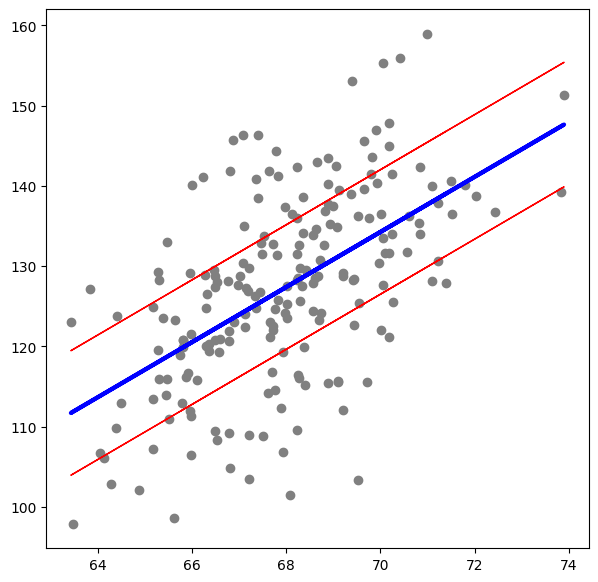

In [63]:
# 단순한 값보다는 그래프로 도식화하는게 이해력에 더 많은 도움을 준다. (해당 모델은 등분산을 이룬다.)
plt.figure(figsize=(7, 7))
plt.scatter(x, y, color='gray')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred-mae, color='red', linewidth=1)
plt.plot(x, y_pred+mae, color='red', linewidth=1)

> 위의 그래프에서 분포는 어느 정도 균등하게 퍼져있기 때문에 등분산이라고 한다.
>
> 선형회귀의 경우 등분산성은 선형성, 정규성, 독립성 그리 둘 이상의 피처가 있는 경우 다중공선성 등과 함께 테스트해야한다.
>
### 가장 먼저 x와 y의 선형상관을 알아보자

이 관계의 강도를 측정하는 방법은 피어슨 상관관계를 사용하는데, 일반적으로 수치 데이터에 많이 사용된다. (위 공분산, 아래 상관관계)

$$Cov(X, Y) = E[(X-\mu_{Y})(Y-\mu_{X})]$$

$$Corr(X, Y) = \frac{Cov(X, Y)}{\sigma_{x}\sigma_{y}}$$

In [79]:
# 상관관계가 0.5이상이면 강한 상관관계를 갖는다, pvalue가 0.05보다 작으면 유의수준이다라고 합니다.
corr, pval = pearsonr(x.to_numpy().reshape(-1,), y.to_numpy().reshape(-1, ))
print('상관관계 :', corr)
print('pvalue :', pval<0.05)

상관관계 : 0.5568647346122991
pvalue : True


> 선택 편향 : 예를 들어 성별 변수 포함되어 있지만, 남성이 더 많을 경우
>
> 누락 변수 편향 : 몸무게 성별보다는 생활 방식, 가난, 임신 등과 같은 상황과 더 연관있다면?
>
> 공정성 / 책임성 / 투명성
> 
> 블랙박스 모델 : 불투명한 모델로, **입력이 출력으로 변환되는 과정을 볼 수 없는 시스템**
> 
> 화이트박스 모델 : 본질적으로 **해석가능한 모델**
>
> 표본 편향 : 데이터인 표본이 모집단으로 부르는 환경을 정확하게 나타내지 않는 경우
>
> 배제 편향 : 중요한 현상을 설명할 수 있는 피처나 그룹을 데이터에서 빠뜨리는 경우
>
> 편견 편향 : 고정 관념이 데이터에 직간접적으로 영향을 미치는 경우
>
> 측정 편향 : 잘못된 측정값이 데이터를 왜곡한 경우

